# 👋 PyCaret Regression

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
# check installed version (must be >3.0)
!pip install pycaret[full]
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [2]:
import pandas as pd
import numpy as np
import urllib.request
import io
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

dataset_data = '/content/drive/MyDrive/Dataset/NASA93.csv'

df = pd.read_csv(dataset_data)

print(df.head())

Mounted at /content/drive
   prec  flex  resl  team  pmat  rely  data  cplx  ruse  docu  ...  \
0  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
1  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
2  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
3  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
4  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   

   Contract Design   Rework  Requirements Legibility  Sharing of Resources  \
0              0.85    1.15                     0.85                  0.85   
1              0.85    1.15                     0.85                  0.85   
2              0.85    1.15                     0.85                  0.85   
3              0.85    1.15                     0.85                  0.85   
4              0.85    1.15                     0.85                  0.85   

   Development Productivity  Reuse  Process Compliance   Process Maturity  \
0      

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [3]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df, target = 'effort', session_id = 123)

Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [4]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [6]:
# init setup on exp
exp.setup(df, target = 'effort', session_id = 123)

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [7]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Plotting Dependent Variable(Effort) vs. Independent Variables


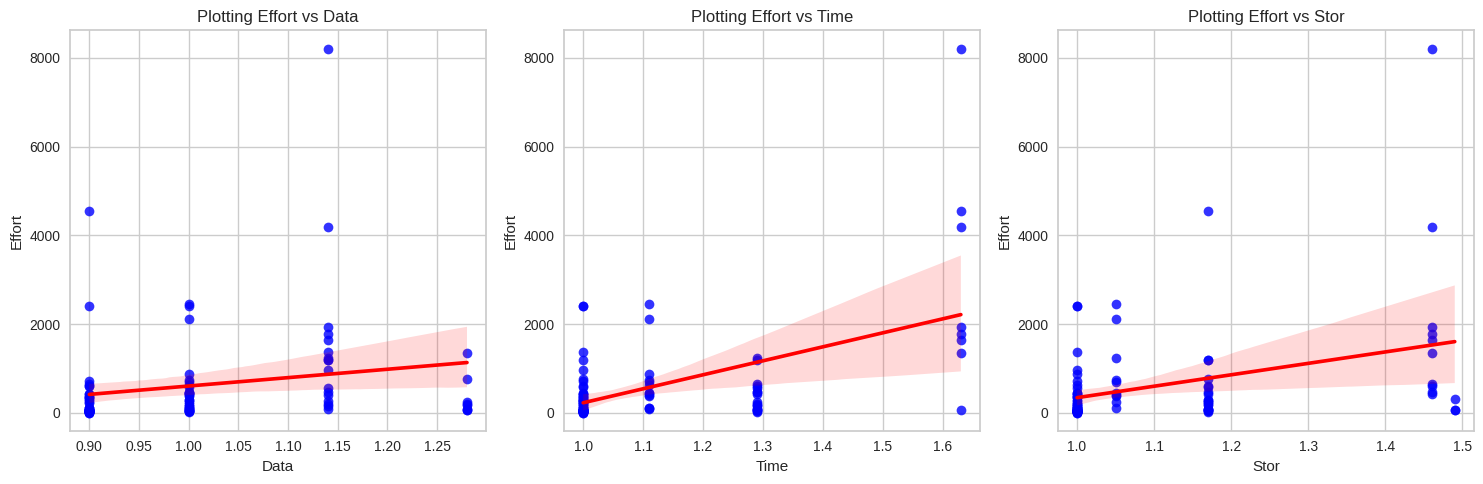

In [8]:
features = ['data', 'time', 'stor']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=feature, y='effort', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title(f'Plotting Effort vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Effort')

plt.tight_layout()
plt.show()

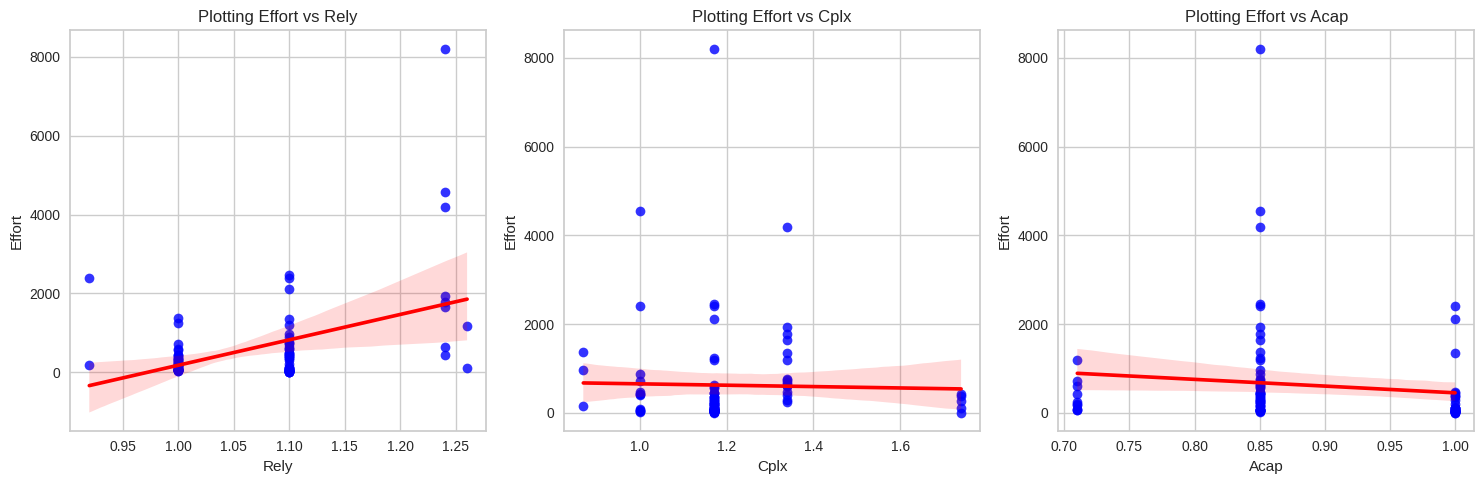

In [9]:
features = ['rely', 'cplx', 'acap']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=feature, y='effort', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title(f'Plotting Effort vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Effort')

plt.tight_layout()
plt.show()

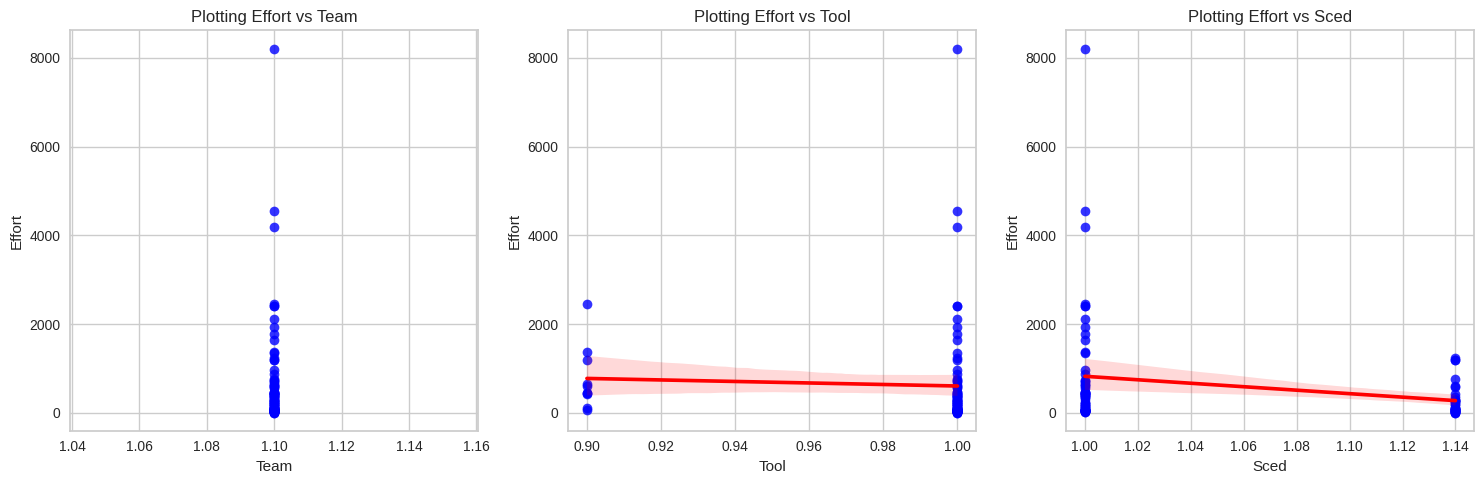

In [10]:
features = ['team', 'tool', 'sced']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=feature, y='effort', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title(f'Plotting Effort vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Effort')

plt.tight_layout()
plt.show()

In [11]:
# compare models using OOP
# exp.compare_models()

In [12]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

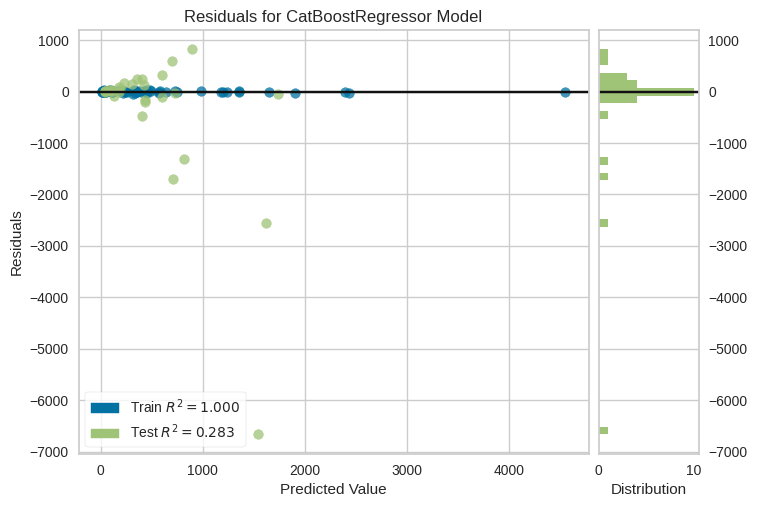

In [13]:
# plot residuals
plot_model(best, plot = 'residuals')

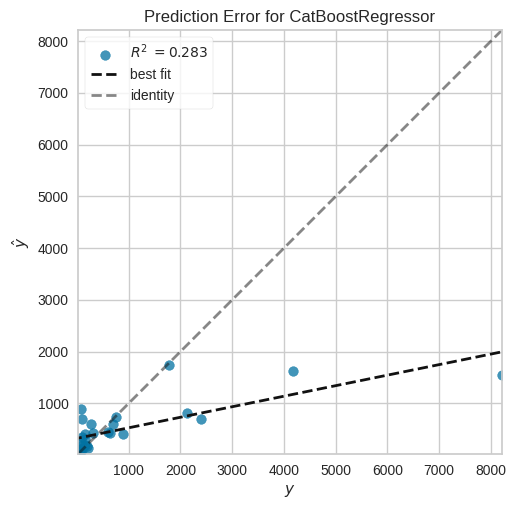

In [14]:
# plot error
plot_model(best, plot = 'error')

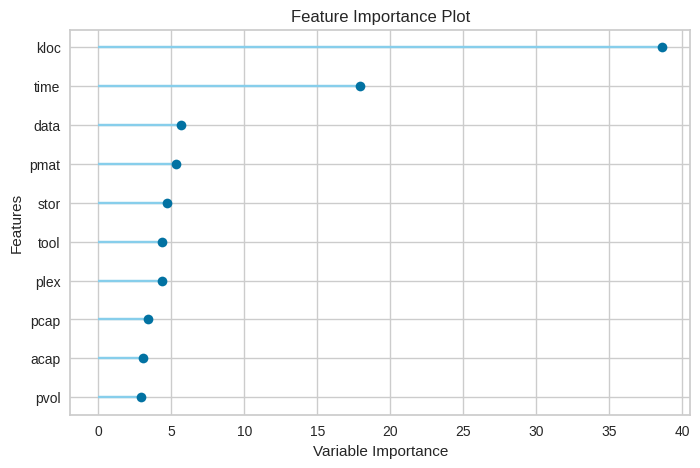

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

In [16]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [18]:
# predict on test set
holdout_pred = predict_model(best)

In [19]:
# show predictions df
holdout_pred.head()

prec  flex  resl  team  pmat  rely  data  cplx  ruse  docu  ...  \
71  2.48  2.03  2.83   1.1  6.24  1.00  1.00  1.17     1     1  ...   
62  2.48  2.03  2.83   1.1  4.68  1.00  1.00  1.17     1     1  ...   
29  2.48  2.03  2.83   1.1  3.12  1.00  1.28  1.17     1     1  ...   
53  2.48  2.03  2.83   1.1  6.24  1.10  1.00  1.17     1     1  ...   
89  2.48  2.03  2.83   1.1  3.12  1.24  1.14  1.17     1     1  ...   

    Requirements Legibility  Sharing of Resources  Development Productivity  \
71                     0.85                  0.85                      0.85   
62                     0.85                  0.85                      0.85   
29                     0.85                  0.85                      0.85   
53                     0.85                  0.85                      0.85   
89                     0.85                  0.85                      0.85   

    Reuse  Process Compliance   Process Maturity  Process Model  \
71   0.85                 0.85              0.85           0.85   
62   0.85                 0.85              0.85           0.85   
29   0.85                 0.85              0.85           0.85   
53   0.85                 0.85              0.85           0.85   
89   0.85                 0.85              0.85           0.85   

    Work Pressure  effort  prediction_label  
71           1.15   300.0        427.333396  
62           1.15   162.0        302.968960  
29           1.15    62.0         84.649716  
53           1.15  2120.0        812.689847  
89           1.15  8211.0       1543.162641  

[5 rows x 51 columns]

The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [21]:
# copy data and drop charges

new_data = df.copy()
new_data.drop('effort', axis=1, inplace=True)
new_data.head()

prec  flex  resl  team  pmat  rely  data  cplx  ruse  docu  ...  \
0  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
1  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
2  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
3  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   
4  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...   

   Contract Design   Rework  Requirements Legibility  Sharing of Resources  \
0              0.85    1.15                     0.85                  0.85   
1              0.85    1.15                     0.85                  0.85   
2              0.85    1.15                     0.85                  0.85   
3              0.85    1.15                     0.85                  0.85   
4              0.85    1.15                     0.85                  0.85   

   Development Productivity  Reuse  Process Compliance   Process Maturity  \
0                      0.85   0.85                 0.85              0.85   
1                      0.85   0.85                 0.85              0.85   
2                      0.85   0.85                 0.85              0.85   
3                      0.85   0.85                 0.85              0.85   
4                      0.85   0.85                 0.85              0.85   

   Process Model  Work Pressure  
0           0.85           1.15  
1           0.85           1.15  
2           0.85           1.15  
3           0.85           1.15  
4           0.85           1.15  

[5 rows x 49 columns]

In [22]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

prec  flex  resl  team  pmat  rely  data  cplx  ruse  docu  ...  Rework  \
0  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...    1.15   
1  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...    1.15   
2  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...    1.15   
3  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...    1.15   
4  2.48  2.03  2.83   1.1  3.12   1.1   0.9  1.17     1     1  ...    1.15   

   Requirements Legibility  Sharing of Resources  Development Productivity  \
0                     0.85                  0.85                      0.85   
1                     0.85                  0.85                      0.85   
2                     0.85                  0.85                      0.85   
3                     0.85                  0.85                      0.85   
4                     0.85                  0.85                      0.85   

   Reuse  Process Compliance   Process Maturity  Process Model  Work Pressure  \
0   0.85                 0.85              0.85           0.85           1.15   
1   0.85                 0.85              0.85           0.85           1.15   
2   0.85                 0.85              0.85           0.85           1.15   
3   0.85                 0.85              0.85           0.85           1.15   
4   0.85                 0.85              0.85           0.85           1.15   

   prediction_label  
0        109.905674  
1        109.905674  
2         32.939235  
3         33.962503  
4         42.800008  

[5 rows x 50 columns]

___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [23]:
# save pipeline
save_model(best, 'SEE_Regresi')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                              'pmat', 'rely', 'data', 'cplx',
                                              'ruse', 'docu', 'time', 'stor',
                                              'pvol', 'acap', 'pcap', 'pcon',
                                              'apex', 'plex', 'ltex', 'tool',
                                              'site', 'sced', 'kloc',
                                              'Team Size ', 'Lack of Team Trust',
                                              'Competence Level',
                                              'Client Involvement ',
                                              'Geographic distribution ',
                                              'Knowledge Management ',
                                              'Project Effort', ...],
                             

In [24]:
# load pipeline
loaded_best_pipeline = load_model('SEE_Regresi')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Knowledge Management ',
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7b21939b2110>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [26]:
s = setup(df, target = 'effort', session_id = 123)

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [27]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [28]:
# lets access X_train_transformed
get_config('X_train_transformed')

prec  flex  resl  team  pmat  rely  data  cplx  ruse  docu  ...  \
21  2.48  2.03  2.83   1.1  3.12  1.10  0.90  1.17   1.0   1.0  ...   
59  2.48  2.03  2.83   1.1  4.68  1.00  0.90  1.00   1.0   1.0  ...   
19  2.48  2.03  2.83   1.1  4.68  1.00  0.90  1.17   1.0   1.0  ...   
38  2.48  2.03  2.83   1.1  4.68  1.00  1.00  1.17   1.0   1.0  ...   
91  2.48  2.03  2.83   1.1  4.68  1.10  1.00  1.00   1.0   1.0  ...   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
86  2.48  2.03  2.83   1.1  3.12  1.24  1.14  1.34   1.0   1.0  ...   
57  2.48  2.03  2.83   1.1  3.12  1.10  0.90  1.74   1.0   1.0  ...   
83  2.48  2.03  2.83   1.1  3.12  1.10  0.90  1.74   1.0   1.0  ...   
17  2.48  2.03  2.83   1.1  4.68  1.00  0.90  1.17   1.0   1.0  ...   
66  2.48  2.03  2.83   1.1  4.68  1.24  1.00  1.17   1.0   1.0  ...   

    Contract Design   Rework  Requirements Legibility  Sharing of Resources  \
21              0.85    1.15                     0.85                  0.85   
59              0.85    1.15                     0.85                  0.85   
19              0.85    1.15                     0.85                  0.85   
38              0.85    1.15                     0.85                  0.85   
91              0.85    1.15                     0.85                  0.85   
..               ...     ...                      ...                   ...   
86              0.85    1.15                     0.85                  0.85   
57              0.85    1.15                     0.85                  0.85   
83              0.85    1.15                     0.85                  0.85   
17              0.85    1.15                     0.85                  0.85   
66              0.85    1.15                     0.85                  0.85   

    Development Productivity  Reuse  Process Compliance   Process Maturity  \
21                      0.85   0.85                 0.85              0.85   
59                      0.85   0.85                 0.85              0.85   
19                      0.85   0.85                 0.85              0.85   
38                      0.85   0.85                 0.85              0.85   
91                      0.85   0.85                 0.85              0.85   
..                       ...    ...                  ...               ...   
86                      0.85   0.85                 0.85              0.85   
57                      0.85   0.85                 0.85              0.85   
83                      0.85   0.85                 0.85              0.85   
17                      0.85   0.85                 0.85              0.85   
66                      0.85   0.85                 0.85              0.85   

    Process Model  Work Pressure  
21           0.85           1.15  
59           0.85           1.15  
19           0.85           1.15  
38           0.85           1.15  
91           0.85           1.15  
..            ...            ...  
86           0.85           1.15  
57           0.85           1.15  
83           0.85           1.15  
17           0.85           1.15  
66           0.85           1.15  

[65 rows x 49 columns]

In [29]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [30]:
# help(setup)

In [32]:
# init setup with normalize = True
s = setup(df, target = 'effort', session_id = 123,
          normalize = True, normalize_method = 'minmax')

<Axes: >

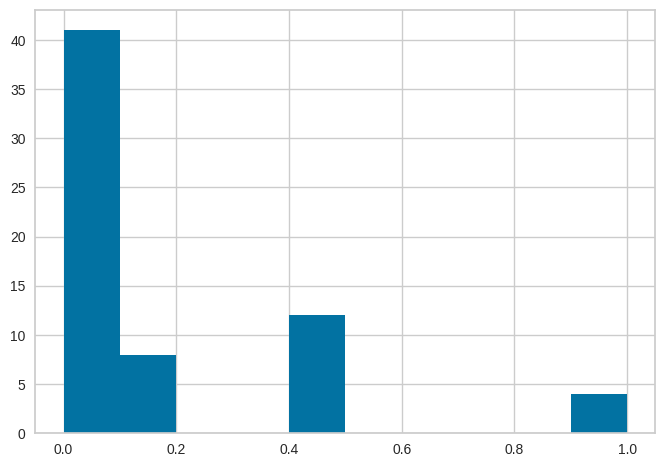

In [33]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['time'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

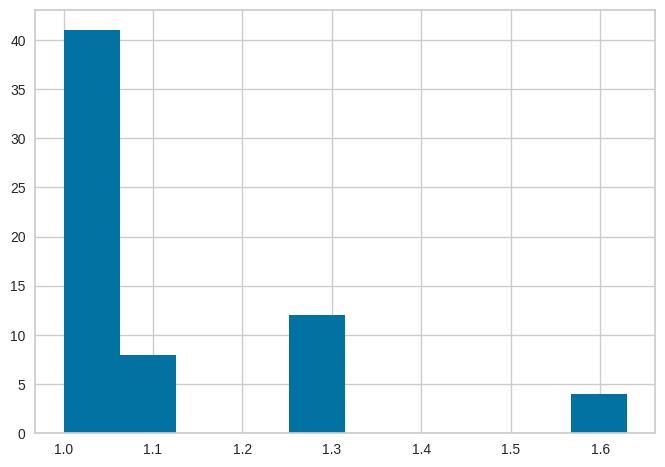

In [35]:
get_config('X_train')['time'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [36]:
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [37]:
# check available models
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [38]:
compare_tree_models = compare_models(include = ['lr', 'svm', 'rf', 'dt', 'knn'])

Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [39]:
compare_tree_models

RandomForestRegressor(n_jobs=-1, random_state=123)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [40]:
compare_tree_models_results = pull()
compare_tree_models_results

Model       MAE          MSE      RMSE      R2  \
rf     Random Forest Regressor  265.4841  313069.1230  472.3082  0.1147   
knn      K Neighbors Regressor  355.5301  434327.7253  548.1391 -0.0628   
lr           Linear Regression  253.4828  153644.3384  356.8596 -0.0789   
svm  Support Vector Regression  430.4776  593641.6817  646.2434 -0.2767   
dt     Decision Tree Regressor  359.9729  584478.9087  643.6864 -3.8918   

      RMSLE    MAPE  TT (Sec)  
rf   0.7039  0.9025     0.176  
knn  1.0066  1.2034     0.036  
lr   0.9259  1.8475     0.915  
svm  1.4950  4.0425     0.038  
dt   0.8503  0.7590     0.037

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [41]:
best_mae_models_top5 = compare_models(sort = 'MAE', n_select = 5)

Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [42]:
# list of top 3 models by MAE
best_mae_models_top5

[OrthogonalMatchingPursuit(),
 BayesianRidge(),
 Lasso(random_state=123),
 LassoLars(random_state=123),
 LinearRegression(n_jobs=-1)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [43]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [44]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [45]:
# compare models
# best = compare_models()

In [46]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [47]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [48]:
# check all the available models
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [49]:
# train linear regression with default fold=10
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [55]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                           
0     106.3143  1.316903e+04   114.7564  0.7770  1.1284  2.3628
1     207.9714  7.564371e+04   275.0340 -1.1892  0.9179  0.5102
2     583.3029  8.118539e+05   901.0294 -0.2875  1.5376  2.7735
3     421.5544  2.681189e+05   517.8020 -0.8314  1.3058  0.8418
4     615.8115  1.799940e+06  1341.6183  0.2365  1.0902  1.3761
5     389.4400  2.758203e+05   525.1860  0.0653  0.9373  0.5930
6     612.3466  8.111204e+05   900.6223  0.1529  1.1188  1.4004
7     256.4800  1.453039e+05   381.1874  0.3665  0.4507  0.3151
8     159.1133  4.510953e+04   212.3900 -0.5968  0.9633  1.2276
9     202.9667  9.719779e+04   311.7656  0.6784  0.6163  0.6332
Mean  355.5301  4.343277e+05   548.1391 -0.0628  1.0066  1.2034
Std   186.1824  5.344957e+05   365.8841  0.6154  0.2969  0.7731

In [56]:
svm_results = pull()
print(type(svm_results))
svm_results

<class 'pandas.core.frame.DataFrame'>


MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                           
0     106.3143  1.316903e+04   114.7564  0.7770  1.1284  2.3628
1     207.9714  7.564371e+04   275.0340 -1.1892  0.9179  0.5102
2     583.3029  8.118539e+05   901.0294 -0.2875  1.5376  2.7735
3     421.5544  2.681189e+05   517.8020 -0.8314  1.3058  0.8418
4     615.8115  1.799940e+06  1341.6183  0.2365  1.0902  1.3761
5     389.4400  2.758203e+05   525.1860  0.0653  0.9373  0.5930
6     612.3466  8.111204e+05   900.6223  0.1529  1.1188  1.4004
7     256.4800  1.453039e+05   381.1874  0.3665  0.4507  0.3151
8     159.1133  4.510953e+04   212.3900 -0.5968  0.9633  1.2276
9     202.9667  9.719779e+04   311.7656  0.6784  0.6163  0.6332
Mean  355.5301  4.343277e+05   548.1391 -0.0628  1.0066  1.2034
Std   186.1824  5.344957e+05   365.8841  0.6154  0.2969  0.7731

In [57]:
rf_results = pull()
print(type(rf_results))
rf_results

<class 'pandas.core.frame.DataFrame'>


MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                           
0     106.3143  1.316903e+04   114.7564  0.7770  1.1284  2.3628
1     207.9714  7.564371e+04   275.0340 -1.1892  0.9179  0.5102
2     583.3029  8.118539e+05   901.0294 -0.2875  1.5376  2.7735
3     421.5544  2.681189e+05   517.8020 -0.8314  1.3058  0.8418
4     615.8115  1.799940e+06  1341.6183  0.2365  1.0902  1.3761
5     389.4400  2.758203e+05   525.1860  0.0653  0.9373  0.5930
6     612.3466  8.111204e+05   900.6223  0.1529  1.1188  1.4004
7     256.4800  1.453039e+05   381.1874  0.3665  0.4507  0.3151
8     159.1133  4.510953e+04   212.3900 -0.5968  0.9633  1.2276
9     202.9667  9.719779e+04   311.7656  0.6784  0.6163  0.6332
Mean  355.5301  4.343277e+05   548.1391 -0.0628  1.0066  1.2034
Std   186.1824  5.344957e+05   365.8841  0.6154  0.2969  0.7731

In [58]:
dt_results = pull()
print(type(dt_results))
dt_results

<class 'pandas.core.frame.DataFrame'>


MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                           
0     106.3143  1.316903e+04   114.7564  0.7770  1.1284  2.3628
1     207.9714  7.564371e+04   275.0340 -1.1892  0.9179  0.5102
2     583.3029  8.118539e+05   901.0294 -0.2875  1.5376  2.7735
3     421.5544  2.681189e+05   517.8020 -0.8314  1.3058  0.8418
4     615.8115  1.799940e+06  1341.6183  0.2365  1.0902  1.3761
5     389.4400  2.758203e+05   525.1860  0.0653  0.9373  0.5930
6     612.3466  8.111204e+05   900.6223  0.1529  1.1188  1.4004
7     256.4800  1.453039e+05   381.1874  0.3665  0.4507  0.3151
8     159.1133  4.510953e+04   212.3900 -0.5968  0.9633  1.2276
9     202.9667  9.719779e+04   311.7656  0.6784  0.6163  0.6332
Mean  355.5301  4.343277e+05   548.1391 -0.0628  1.0066  1.2034
Std   186.1824  5.344957e+05   365.8841  0.6154  0.2969  0.7731

In [59]:
knn_results = pull()
print(type(knn_results))
knn_results

<class 'pandas.core.frame.DataFrame'>


MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                           
0     106.3143  1.316903e+04   114.7564  0.7770  1.1284  2.3628
1     207.9714  7.564371e+04   275.0340 -1.1892  0.9179  0.5102
2     583.3029  8.118539e+05   901.0294 -0.2875  1.5376  2.7735
3     421.5544  2.681189e+05   517.8020 -0.8314  1.3058  0.8418
4     615.8115  1.799940e+06  1341.6183  0.2365  1.0902  1.3761
5     389.4400  2.758203e+05   525.1860  0.0653  0.9373  0.5930
6     612.3466  8.111204e+05   900.6223  0.1529  1.1188  1.4004
7     256.4800  1.453039e+05   381.1874  0.3665  0.4507  0.3151
8     159.1133  4.510953e+04   212.3900 -0.5968  0.9633  1.2276
9     202.9667  9.719779e+04   311.7656  0.6784  0.6163  0.6332
Mean  355.5301  4.343277e+05   548.1391 -0.0628  1.0066  1.2034
Std   186.1824  5.344957e+05   365.8841  0.6154  0.2969  0.7731

In [60]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
svm = create_model('svm', fold=3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
rf = create_model('rf', fold=3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
dt = create_model('dt', fold=3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [65]:
knn = create_model('knn', fold=3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [73]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [74]:
create_model('svm', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

SVR()

In [75]:
create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=123)

In [76]:
create_model('dt', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeRegressor(random_state=123)

In [77]:
create_model('knn', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [78]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [79]:
# train a dt model with default params
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [81]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
# tune hyperparameters
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [85]:
tuned_svm = tune_model(svm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [86]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [87]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [88]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [89]:
lr

LinearRegression(n_jobs=-1)

In [90]:
svm

SVR()

In [91]:
rf

RandomForestRegressor(n_jobs=-1, random_state=123)

In [92]:
dt

DecisionTreeRegressor(random_state=123)

In [93]:
knn

KNeighborsRegressor(n_jobs=-1)

## MAE

In [95]:
# define tuning grid with valid parameters for Linear Regression
lr_grid = {'fit_intercept' : [True, False]} # Example: tuning 'fit_intercept'

# tune model with custom grid and metric = MAE
tuned_lr = tune_model(lr, custom_grid = lr_grid, optimize = 'MAE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [97]:
# define tuning grid with valid parameters for SVR
svm_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]} # Example: tuning 'C' and 'epsilon'

# tune model with custom grid and metric = MAE
tuned_svm = tune_model(svm, custom_grid = svm_grid, optimize = 'MAE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [100]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = MAE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'MAE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = MAE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'MAE')

In [101]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [103]:
# Remove the invalid parameter 'max_depth' for KNeighborsRegressor
knn_grid = {'n_neighbors': [3, 5, 7, 9],  # Example of valid parameters
            'weights': ['uniform', 'distance']}

# tune model with custom grid and metric = MAE
tuned_knn = tune_model(knn, custom_grid = knn_grid, optimize = 'MAE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


##RMSE

In [104]:
# define tuning grid with valid parameters for Linear Regression
lr_grid = {'fit_intercept' : [True, False]} # Example: tuning 'fit_intercept'

# tune model with custom grid and metric = MAE
tuned_lr = tune_model(lr, custom_grid = lr_grid, optimize = 'RMSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [105]:
# define tuning grid with valid parameters for SVR
svm_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]} # Example: tuning 'C' and 'epsilon'

# tune model with custom grid and metric = RMSE
tuned_svm = tune_model(svm, custom_grid = svm_grid, optimize = 'RMSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [106]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = RMSE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'RMSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [107]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = RMSE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'RMSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [108]:
# Remove the invalid parameter 'max_depth' for KNeighborsRegressor
knn_grid = {'n_neighbors': [3, 5, 7, 9],  # Example of valid parameters
            'weights': ['uniform', 'distance']}

# tune model with custom grid and metric = RMSE
tuned_knn = tune_model(knn, custom_grid = knn_grid, optimize = 'RMSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


#R2

In [122]:
# define tuning grid with valid parameters for Linear Regression
lr_grid = {'fit_intercept' : [True, False]} # Example: tuning 'fit_intercept'

# tune model with custom grid and metric = R2
tuned_lr = tune_model(lr, custom_grid = lr_grid, optimize = 'R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [123]:
# define tuning grid with valid parameters for SVR
svm_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]} # Example: tuning 'C' and 'epsilon'

# tune model with custom grid and metric = R2
tuned_svm = tune_model(svm, custom_grid = svm_grid, optimize = 'R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [124]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = R2
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [125]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = R2
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [126]:
# Remove the invalid parameter 'max_depth' for KNeighborsRegressor
knn_grid = {'n_neighbors': [3, 5, 7, 9],  # Example of valid parameters
            'weights': ['uniform', 'distance']}

# tune model with custom grid and metric = R2
tuned_knn = tune_model(knn, custom_grid = knn_grid, optimize = 'R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


##MSE

In [127]:
# define tuning grid with valid parameters for Linear Regression
lr_grid = {'fit_intercept' : [True, False]} # Example: tuning 'fit_intercept'

# tune model with custom grid and metric = MSE
tuned_lr = tune_model(lr, custom_grid = lr_grid, optimize = 'MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [128]:
# define tuning grid with valid parameters for SVR
svm_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]} # Example: tuning 'C' and 'epsilon'

# tune model with custom grid and metric = MSE
tuned_svm = tune_model(svm, custom_grid = svm_grid, optimize = 'MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [129]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = MSE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [130]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MSE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [131]:
# Remove the invalid parameter 'max_depth' for KNeighborsRegressor
knn_grid = {'n_neighbors': [3, 5, 7, 9],  # Example of valid parameters
            'weights': ['uniform', 'distance']}

# tune model with custom grid and metric = MSE
tuned_knn = tune_model(knn, custom_grid = knn_grid, optimize = 'MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


##RMSLE

In [133]:
# define tuning grid with valid parameters for Linear Regression
lr_grid = {'fit_intercept' : [True, False]} # Example: tuning 'fit_intercept'

# tune model with custom grid and metric = RMSLE
tuned_lr = tune_model(lr, custom_grid = lr_grid, optimize = 'RMSLE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [134]:
# define tuning grid with valid parameters for SVR
svm_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]} # Example: tuning 'C' and 'epsilon'

# tune model with custom grid and metric = RMSLE
tuned_svm = tune_model(svm, custom_grid = svm_grid, optimize = 'RMSLE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [135]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = RMSLE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'RMSLE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [136]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = RMSLE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'RMSLE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [137]:
# Remove the invalid parameter 'max_depth' for KNeighborsRegressor
knn_grid = {'n_neighbors': [3, 5, 7, 9],  # Example of valid parameters
            'weights': ['uniform', 'distance']}

# tune model with custom grid and metric = RMSLE
tuned_knn = tune_model(knn, custom_grid = knn_grid, optimize = 'RMSLE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


##MAPE

In [138]:
# define tuning grid with valid parameters for Linear Regression
lr_grid = {'fit_intercept' : [True, False]} # Example: tuning 'fit_intercept'

# tune model with custom grid and metric = MAPE
tuned_lr = tune_model(lr, custom_grid = lr_grid, optimize = 'MAPE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [139]:
# define tuning grid with valid parameters for SVR
svm_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]} # Example: tuning 'C' and 'epsilon'

# tune model with custom grid and metric = MAPE
tuned_svm = tune_model(svm, custom_grid = svm_grid, optimize = 'MAPE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [140]:
# define tuning grid with valid parameters for RandomForestRegressor
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 10, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

# tune model with custom grid and metric = MAPE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'MAPE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [141]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAPE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAPE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [142]:
# Remove the invalid parameter 'max_depth' for KNeighborsRegressor
knn_grid = {'n_neighbors': [3, 5, 7, 9],  # Example of valid parameters
            'weights': ['uniform', 'distance']}

# tune model with custom grid and metric = MAPE
tuned_knn = tune_model(knn, custom_grid = knn_grid, optimize = 'MAPE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [143]:
# to access the tuner object you can set return_tuner = True
tuned_lr, tuner = tune_model(lr, return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [144]:
tuned_svm, tuner = tune_model(svm, return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [145]:
tuned_rf, tuner = tune_model(rf, return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [146]:
tuned_dt, tuner = tune_model(dt, return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [147]:
tuned_knn, tuner = tune_model(knn, return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [148]:
# model object
tuned_lr

LinearRegression(fit_intercept=False, n_jobs=-1)

In [149]:
tuned_svm

SVR(C=9.289, epsilon=1.55, shrinking=False)

In [150]:
tuned_rf

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=4,
                      max_features='log2', min_impurity_decrease=0.0002,
                      min_samples_leaf=5, min_samples_split=9, n_estimators=130,
                      n_jobs=-1, random_state=123)

In [151]:
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='log2', min_impurity_decrease=0.0002,
                      min_samples_leaf=5, min_samples_split=5,
                      random_state=123)

In [152]:
tuned_knn

KNeighborsRegressor(metric='manhattan', n_jobs=-1, n_neighbors=8)

In [153]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['prec',
                                                                          'flex',
                                                                          'resl',
                                                                          'team',
                                                                          'pmat',
                                                                          'rely',
                                                                          'data',
                                                                          'cplx',
                                                                          'ruse',
                                                                          'docu',
                                                                          'time',
                                                                          'stor',
                                                                          'pvol',
                                                                          'acap',
                                                                          'pcap',
                                                                          'pcon',
                                                                          'apex',
                                                                          'plex',
                                                                          'ltex',
                                                                          'tool',
                                                                          'site',
                                                                          'sced',
                                                                          'kloc',
                                                                          'Team '
                                                                          'Size '...
                                              KNeighborsRegressor(n_jobs=-1))]),
                   n_jobs=-1,
                   param_distributions={'actual_estimator__metric': ['minkowski',
                                                                     'euclidean',
                                                                     'manhattan'],
                                        'actual_estimator__n_neighbors': [1, 2,
                                                                          3, 4,
                                                                          5, 6,
                                                                          7, 8,
                                                                          9, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19,
                                                                          20,
                                                                          21,
                                                                          22,
                                         

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [154]:
# tune dt using optuna
tuned_lr = tune_model(lr, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 65 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [155]:
tuned_svm = tune_model(svm, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 65 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [156]:
tuned_rf = tune_model(rf, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 65 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [157]:
tuned_dt = tune_model(dt, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 65 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [158]:
tuned_knn = tune_model(knn, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 65 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [159]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [160]:
# ensemble with bagging
ensemble_model(lr, method = 'Bagging')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=LinearRegression(n_jobs=-1), random_state=123)

In [161]:
ensemble_model(svm, method = 'Bagging')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=SVR(), random_state=123)

In [162]:
ensemble_model(rf, method = 'Bagging')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                 random_state=123)

In [163]:
ensemble_model(dt, method = 'Bagging')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [164]:
ensemble_model(knn, method = 'Bagging')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=KNeighborsRegressor(n_jobs=-1), random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [165]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [166]:
# top 5 models based on mae
best_mae_models_top5

[OrthogonalMatchingPursuit(),
 BayesianRidge(),
 Lasso(random_state=123),
 LassoLars(random_state=123),
 LinearRegression(n_jobs=-1)]

In [167]:
# blend top 5 models
blend_models(best_mae_models_top5)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Orthogonal Matching Pursuit',
                             OrthogonalMatchingPursuit()),
                            ('Bayesian Ridge', BayesianRidge()),
                            ('Lasso Regression', Lasso(random_state=123)),
                            ('Lasso Least Angle Regression',
                             LassoLars(random_state=123)),
                            ('Linear Regression', LinearRegression(n_jobs=-1))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [168]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [169]:
# stack models
stack_models(best_mae_models_top5)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Orthogonal Matching Pursuit',
                               OrthogonalMatchingPursuit()),
                              ('Bayesian Ridge', BayesianRidge()),
                              ('Lasso Regression', Lasso(random_state=123)),
                              ('Lasso Least Angle Regression',
                               LassoLars(random_state=123)),
                              ('Linear Regression',
                               LinearRegression(n_jobs=-1))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [170]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

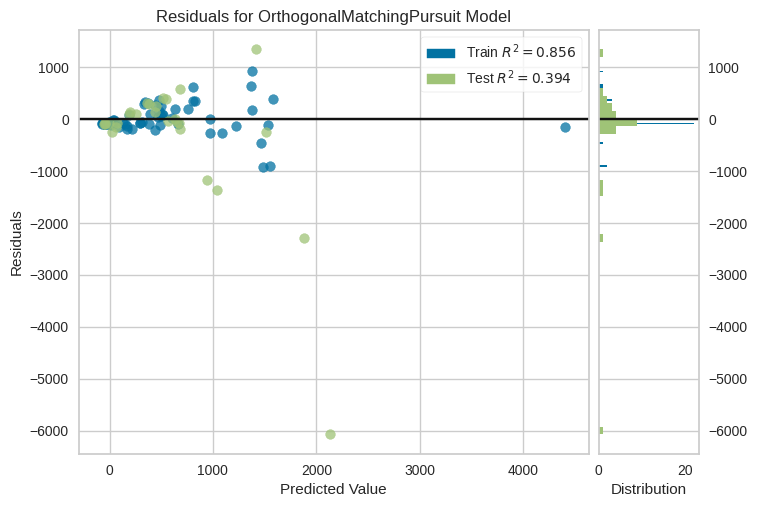

In [171]:
# plot residuals
plot_model(best, plot = 'residuals')

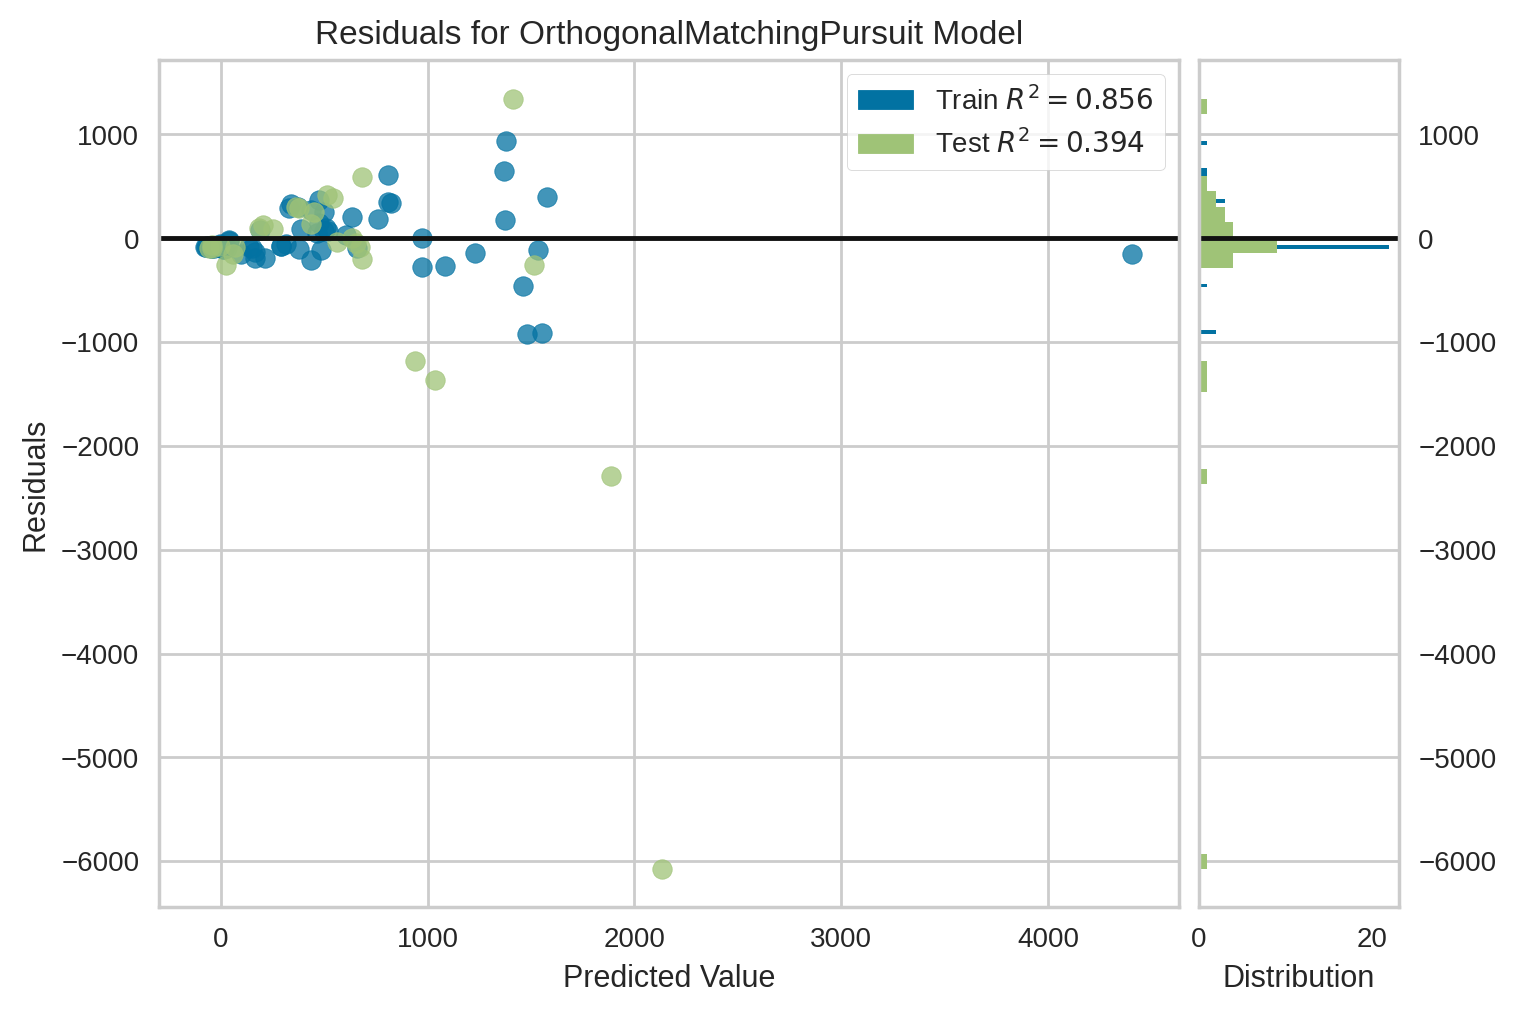

In [172]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [173]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [174]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [175]:
# train model
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [176]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [177]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [178]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [179]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

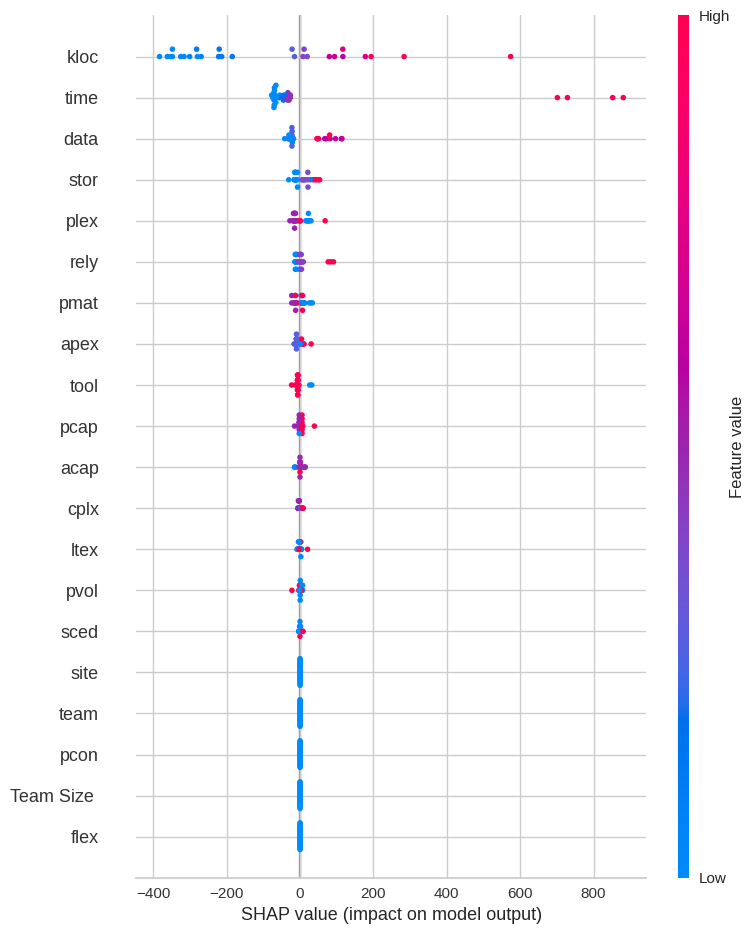

In [183]:
interpret_model(rf, plot = 'summary')

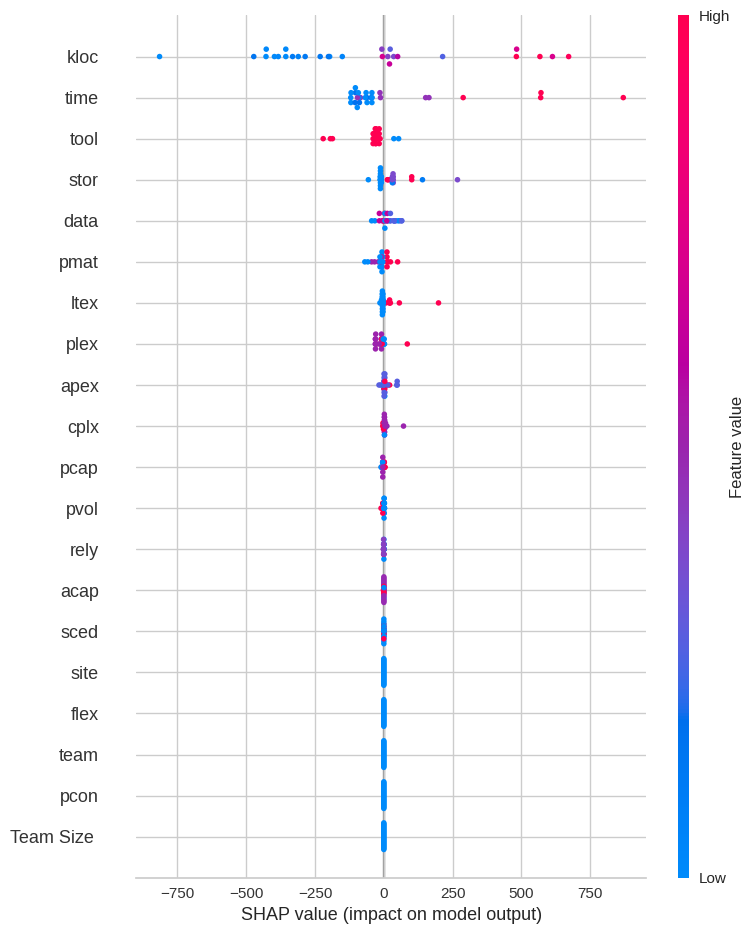

In [184]:
interpret_model(dt, plot = 'summary')

In [189]:
# reason plot for test set observation 1
interpret_model(rf, plot = 'reason', observation = 1)

In [190]:
interpret_model(dt, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [191]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [192]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/193 [00:00<?, ?it/s]

Model Name  \
Index                              
0              Linear Regression   
1               Lasso Regression   
2               Ridge Regression   
3                    Elastic Net   
4         Least Angle Regression   
...                          ...   
187            Linear Regression   
188    Support Vector Regression   
189      Random Forest Regressor   
190      Decision Tree Regressor   
191        K Neighbors Regressor   

                                                   Model       MAE  \
Index                                                                
0      (TransformerWrapper(include=['prec', 'flex', '...  253.4828   
1      (TransformerWrapper(include=['prec', 'flex', '...  240.6464   
2      (TransformerWrapper(include=['prec', 'flex', '...  305.2844   
3      (TransformerWrapper(include=['prec', 'flex', '...  426.0199   
4      (TransformerWrapper(include=['prec', 'flex', '...  293.2454   
...                                                  ...       ...   
187    (TransformerWrapper(include=['prec', 'flex', '...  253.4828   
188    (TransformerWrapper(include=['prec', 'flex', '...  430.4776   
189    (TransformerWrapper(include=['prec', 'flex', '...  265.4841   
190    (TransformerWrapper(include=['prec', 'flex', '...  359.9729   
191    (TransformerWrapper(include=['prec', 'flex', '...  355.5301   

               MSE      RMSE      R2   RMSLE    MAPE  
Index                                                 
0      153644.3384  356.8596 -0.0789  0.9259  1.8475  
1      135056.3506  339.6411  0.0392  0.9358  1.7295  
2      217006.3512  420.8145  0.2344  1.0979  2.6511  
3      459664.2795  573.6013 -0.2388  1.5154  5.1514  
4      246932.3223  425.2518 -0.2085  0.9728  1.8192  
...            ...       ...     ...     ...     ...  
187    153644.3384  356.8596 -0.0789  0.9259  1.8475  
188    593641.6817  646.2434 -0.2767  1.4950  4.0425  
189    313069.1230  472.3082  0.1147  0.7039  0.9025  
190    584478.9087  643.6864 -3.8918  0.8503  0.7590  
191    434327.7253  548.1391 -0.0628  1.0066  1.2034  

[187 rows x 8 columns]

In [193]:
# select the best model based on
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...nagement ',
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', OrthogonalMatchingPursuit()]])

In [194]:
lb.sort_values(by='MSE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...nagement ',
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', OrthogonalMatchingPursuit()]])

In [195]:
lb.sort_values(by='RMSE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...nagement ',
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', OrthogonalMatchingPursuit()]])

In [196]:
lb.sort_values(by='R2', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', DecisionTreeRegressor(random_state=123)]])

In [197]:
lb.sort_values(by='RMSLE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123)]])

In [198]:
lb.sort_values(by='MAPE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', DecisionTreeRegressor(random_state=123)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [218]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [219]:
# find best model based on CV metrics
automl()

DecisionTreeRegressor(random_state=123)

In [226]:
# create gradio app
create_app(best)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d9cbd7597f5b4a0a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [227]:
# create api
create_api(best, api_name = 'SEE_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python SEE_api.py


In [228]:
# !python my_first_api.py

In [229]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [230]:
create_docker('SEE_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [231]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [232]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [233]:
final_best = finalize_model(best)

In [234]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distribution ',
                                             'Kn...ement ',
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', OrthogonalMatchingPursuit())])

In [235]:
# transpiles learned function to java
print(convert_model(lr, language = 'java'))

public class Model {
    public static double score(double[] input) {
        return 626.7635498046875 + input[0] * 0.00006467473576776683 + input[1] * -0.000152587890625 + input[2] * 0.0 + input[3] * 0.0003662109375 + input[4] * -138.62576293945312 + input[5] * -731.7867431640625 + input[6] * -131.38143920898438 + input[7] * -188.21214294433594 + input[8] * 0.0001220703125 + input[9] * -0.0001220703125 + input[10] * 1862.5185546875 + input[11] * 117.17594909667969 + input[12] * -415.61004638671875 + input[13] * 618.0538330078125 + input[14] * 64.1330795288086 + input[15] * -0.00000762939453125 + input[16] * -155.73773193359375 + input[17] * -849.1702880859375 + input[18] * 273.66314697265625 + input[19] * -484.3927001953125 + input[20] * 0.0 + input[21] * 5.7569580078125 + input[22] * 4026.52099609375 + input[23] * 0.0 + input[24] * 0.0 + input[25] * 0.0 + input[26] * 0.0 + input[27] * 0.0 + input[28] * 0.0 + input[29] * 0.0 + input[30] * 0.0 + input[31] * 0.0 + input[32] * 0.0 + inpu

In [236]:
print(convert_model(svm, language = 'java'))

public class Model {
    public static double score(double[] input) {
        return 307.40179885178804 + Math.exp(-0.2808405927727633 * (Math.pow(0.0 - input[0], 2.0) + Math.pow(0.0 - input[1], 2.0) + Math.pow(0.0 - input[2], 2.0) + Math.pow(0.0 - input[3], 2.0) + Math.pow(0.5 - input[4], 2.0) + Math.pow(0.23529410362243652 - input[5], 2.0) + Math.pow(0.0 - input[6], 2.0) + Math.pow(0.14942526817321777 - input[7], 2.0) + Math.pow(0.0 - input[8], 2.0) + Math.pow(0.0 - input[9], 2.0) + Math.pow(0.0 - input[10], 2.0) + Math.pow(0.0 - input[11], 2.0) + Math.pow(0.0 - input[12], 2.0) + Math.pow(0.0 - input[13], 2.0) + Math.pow(0.0 - input[14], 2.0) + Math.pow(0.0 - input[15], 2.0) + Math.pow(0.6551723480224609 - input[16], 2.0) + Math.pow(0.0 - input[17], 2.0) + Math.pow(0.0 - input[18], 2.0) + Math.pow(1.0 - input[19], 2.0) + Math.pow(0.0 - input[20], 2.0) + Math.pow(0.0 - input[21], 2.0) + Math.pow(0.3565519452095032 - input[22], 2.0) + Math.pow(0.0 - input[23], 2.0) + Math.pow(0.0 - inp

In [237]:
print(convert_model(rf, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[22] <= 0.3938310742378235) {
            if (input[22] <= 0.10172608494758606) {
                if (input[22] <= 0.04938208870589733) {
                    if (input[16] <= 0.8275861740112305) {
                        if (input[22] <= 0.015269124880433083) {
                            if (input[22] <= 0.006230211816728115) {
                                if (input[12] <= 0.5) {
                                    if (input[22] <= 0.003676846157759428) {
                                        if (input[22] <= 0.001327750040218234) {
                                            var0 = 8.399999618530273;
                                        } else {
                                            var0 = 10.800000190734863;
                                        }
                                    } else {
                                        if (input[16] <= 0.32758617401

In [240]:
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[22] <= 0.394852414727211) {
            if (input[22] <= 0.03150852955877781) {
                if (input[17] <= 0.8214285373687744) {
                    if (input[22] <= 0.015115923248231411) {
                        if (input[22] <= 0.007098355796188116) {
                            if (input[22] <= 0.001736288599204272) {
                                var0 = 8.399999618530273;
                            } else {
                                if (input[22] <= 0.002400163561105728) {
                                    var0 = 38.0;
                                } else {
                                    if (input[22] <= 0.006179144140332937) {
                                        if (input[13] <= 0.7413793802261353) {
                                            var0 = 24.0;
                                        } else {
                                         

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [241]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [242]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [243]:
# save model
save_model(best, 'SEE_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                              'pmat', 'rely', 'data', 'cplx',
                                              'ruse', 'docu', 'time', 'stor',
                                              'pvol', 'acap', 'pcap', 'pcon',
                                              'apex', 'plex', 'ltex', 'tool',
                                              'site', 'sced', 'kloc',
                                              'Team Size ', 'Lack of Team Trust',
                                              'Competence Level',
                                              'Client Involvement ',
                                              'Geographic distribution ',
                                              'Kn...nagement ',
                                              'Project Effort', ...],
                                    

In [244]:
# load model
loaded_from_disk = load_model('SEE_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['prec', 'flex', 'resl', 'team',
                                             'pmat', 'rely', 'data', 'cplx',
                                             'ruse', 'docu', 'time', 'stor',
                                             'pvol', 'acap', 'pcap', 'pcon',
                                             'apex', 'plex', 'ltex', 'tool',
                                             'site', 'sced', 'kloc',
                                             'Team Size ', 'Lack of Team Trust',
                                             'Competence Level',
                                             'Client Involvement ',
                                             'Geographic distri...
                                             'Knowledge Management ',
                                             'Project Effort', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', OrthogonalMatchingPursuit())])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [245]:
# save experiment
save_experiment('see_experiment')

In [247]:
# load experiment from disk
exp_from_disk = load_experiment('see_experiment', data=df)

In [256]:
exp = setup(df,
            target='effort',
            session_id=123,
            normalize=True)

In [257]:
models_to_include = ['lr', 'svm', 'rf', 'dt', 'knn']
best_model = compare_models(include=models_to_include)

Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [258]:
metrics = pull()

In [259]:
print("Evaluation metrics for the selected models:")
print(metrics)

Evaluation metrics for the selected models:
                         Model       MAE          MSE      RMSE      R2  \
knn      K Neighbors Regressor  326.7018  390045.3765  509.6352  0.1360   
rf     Random Forest Regressor  265.3411  313067.5210  472.3661  0.1146   
lr           Linear Regression  253.4827  153644.4004  356.8596 -0.0789   
svm  Support Vector Regression  430.1797  592965.2850  645.6916 -0.2733   
dt     Decision Tree Regressor  359.7562  584455.7254  643.6188 -3.8918   

      RMSLE    MAPE  TT (Sec)  
knn  0.9885  1.1252     0.040  
rf   0.7038  0.9022     0.256  
lr   0.9259  1.8475     0.037  
svm  1.4939  4.0474     0.035  
dt   0.8476  0.7554     0.067  
